Name: Megan Leak

Course number: MSBD 566

Date: 9/13/2025

Honor statement:

The Air Quality Index (AQI) is an index for reporting daily air quality. It tells you how clean
or polluted your air is, and what associated health effects might be a concern for you. The
AQI focuses on health effects you may experience within a few hours or days after breathing
polluted air. The AQI is reported according to the Environmental Protection Agency's scale.
The Health Department obtains the pollen forecast from Pollen.com. Pollen forecasts are
based on a variety of environmental and seasonal factors, including past and current pollen
counts over the past 24 - 72 hours and the weather conditions. The pollen forecasts estimate
how much pollen an allergy sufferer is likely to be exposed to in the future. The pollen
forecast is currently reported on a scale of 0 to 12 as follows:

Pollen Count Pollen Level

0.0 to 2.4      Low

2.5 to 4.8      Low – Medium

4.9 to 7.2      Medium

7.3 to 9.6      Medium – High

9.7 to 12.0     High


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
air_quality_index = pd.read_csv('Air_Quality_and_Pollen_Count.csv')
air_quality_index

,OBJECTID,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,ReportDateTime
0,1,47.0,Good,PM2.5,9.0,Juniper,Maple,2025/04/04 05:00:00+00
1,2,49.0,Good,PM2.5,1.0,Elm,Juniper,2025/04/03 05:00:00+00
2,3,51.0,Moderate,PM2.5,11.0,Elm,Juniper,2025/04/02 05:00:00+00
3,4,50.0,Good,PM2.5,10.0,Elm,Juniper,2025/04/01 05:00:00+00
4,5,50.0,Good,PM2.5,2.0,Elm,Juniper,2025/03/31 05:00:00+00
...,...,...,...,...,...,...,...,...
8915,8916,28.0,Good,PM10,NaN,NaN,NaN,2001/01/08 06:00:00+00
8916,8917,26.0,Good,PM10,NaN,NaN,NaN,2001/01/05 06:00:00+00
8917,8918,25.0,Good,Carbon monoxide,NaN,NaN,NaN,2001/01/04 06:00:00+00
8918,8919,33.0,Good,PM10,NaN,NaN,NaN,2001/01/03 06:00:00+00


In [20]:
cleaned_air_quality_index = air_quality_index.copy()
display(air_quality_index.head())

cleaned_air_quality_index['AQI'] = pd.to_numeric(cleaned_air_quality_index['AQI'], errors='coerce')
cleaned_air_quality_index['ReportDateTime'] = pd.to_datetime(cleaned_air_quality_index['ReportDateTime'], format='%Y/%m/%d %H:%M:%S%z')

print('\n\nCleaned Data:')
display(cleaned_air_quality_index.head())

,OBJECTID,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,ReportDateTime
0,1,47.0,Good,PM2.5,9.0,Juniper,Maple,2025/04/04 05:00:00+00
1,2,49.0,Good,PM2.5,1.0,Elm,Juniper,2025/04/03 05:00:00+00
2,3,51.0,Moderate,PM2.5,11.0,Elm,Juniper,2025/04/02 05:00:00+00
3,4,50.0,Good,PM2.5,10.0,Elm,Juniper,2025/04/01 05:00:00+00
4,5,50.0,Good,PM2.5,2.0,Elm,Juniper,2025/03/31 05:00:00+00




Cleaned Data:


,OBJECTID,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,ReportDateTime
0,1,47.0,Good,PM2.5,9.0,Juniper,Maple,2025-04-04 05:00:00+00:00
1,2,49.0,Good,PM2.5,1.0,Elm,Juniper,2025-04-03 05:00:00+00:00
2,3,51.0,Moderate,PM2.5,11.0,Elm,Juniper,2025-04-02 05:00:00+00:00
3,4,50.0,Good,PM2.5,10.0,Elm,Juniper,2025-04-01 05:00:00+00:00
4,5,50.0,Good,PM2.5,2.0,Elm,Juniper,2025-03-31 05:00:00+00:00


## Question 1

Explore the data by plotting AQI and Category across the years in two separate plots. Make sure they have proper labels and titles. Use a datetime format for the dates.

a. How many times has the AQI been recorded above 120?

b. When did the Air Quality Index Category become unhealthy?


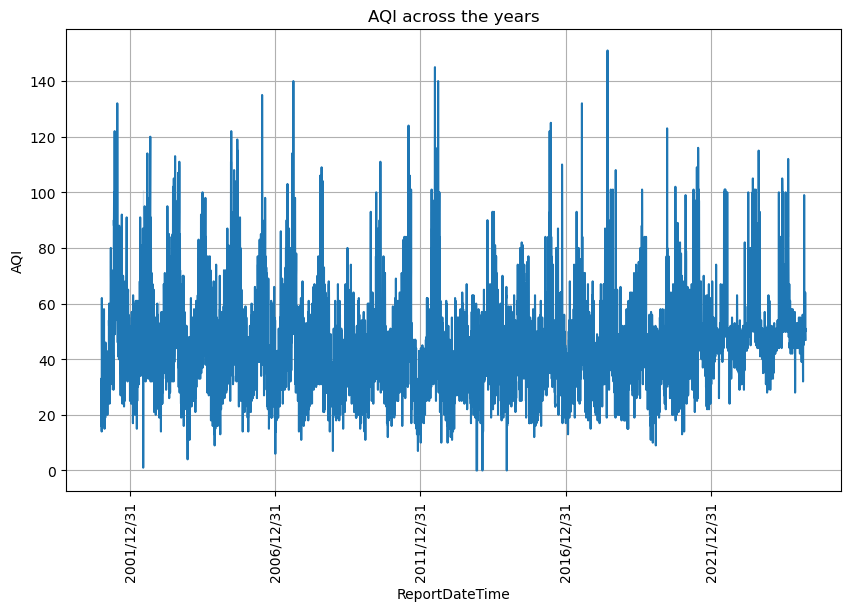

In [53]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=cleaned_air_quality_index, x='ReportDateTime', y='AQI')
xticksList = pd.date_range(start=cleaned_air_quality_index['ReportDateTime'].min(), end=cleaned_air_quality_index['ReportDateTime'].max(), freq='5YE')
plt.xticks(xticksList, xticksList.strftime('%Y/%m/%d'))
rotation = 90
plt.xticks(rotation=rotation)
plt.title('AQI across the years')
plt.xlabel('ReportDateTime')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

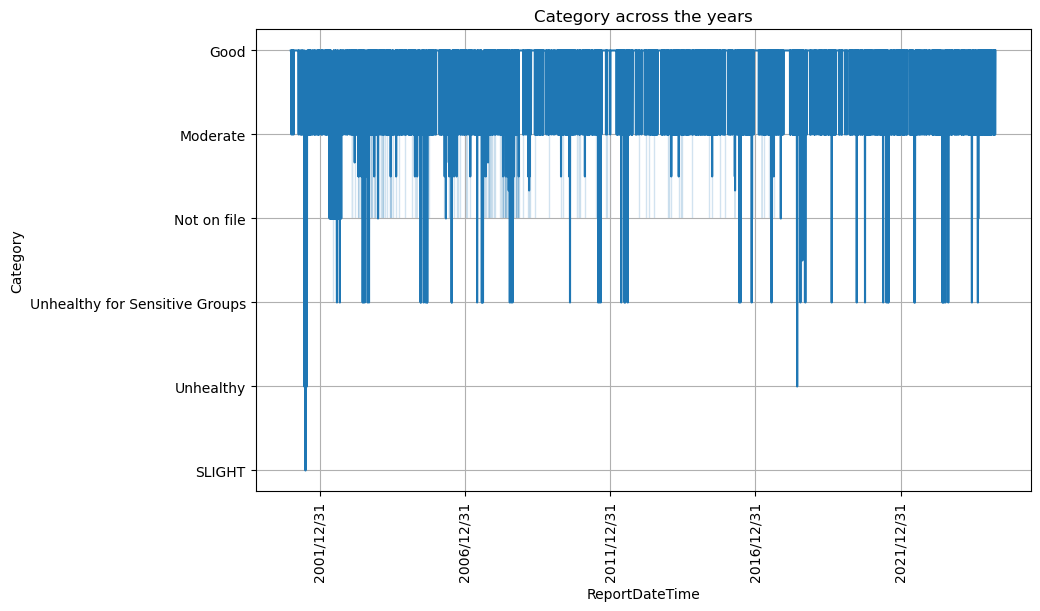

In [55]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=cleaned_air_quality_index, x='ReportDateTime', y='Category')
xticksList = pd.date_range(start=cleaned_air_quality_index['ReportDateTime'].min(), end=cleaned_air_quality_index['ReportDateTime'].max(), freq='5YE')
plt.xticks(xticksList, xticksList.strftime('%Y/%m/%d'))
rotation = 90
plt.xticks(rotation=rotation)
plt.title('Category across the years')
plt.xlabel('ReportDateTime')
plt.ylabel('Category')
plt.grid(True)
plt.show()

In [57]:
# a
aqi_above_120 = cleaned_air_quality_index[cleaned_air_quality_index['AQI']>120].shape[0]
print(f'The AQI has been recorded abover 120 {aqi_above_120} times.')

The AQI has been recorded abover 120 14 times.


In [59]:
# b
air_quality_index_category = air_quality_index[air_quality_index['Category'] == 'Unhealthy']
air_quality_index_category

,OBJECTID,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,ReportDateTime
2507,2508,151.0,Unhealthy,Ozone 8-hr,5.0,Grass,Juniper,2018/06/09 05:00:00+00
8778,8779,132.0,Unhealthy,Ozone 8-hr,5.0,Grass,Slight,2001/07/24 05:00:00+00
8786,8787,105.0,Unhealthy,PM2.5,8.0,Grass,Moderate,2001/07/12 05:00:00+00
8800,8801,122.0,Unhealthy,Ozone 8-hr,3.0,Grass,Slight,2001/06/21 05:00:00+00


## Question 2

Which pollen type occurs the most? Hint: You can use a scatterplot if needed.

In [41]:
pollen_type = air_quality_index['PollenType'].value_counts()
pollen_type

PollenType
Grass        2330
Ragweed       603
Cedar         405
Elm           398
Alder         291
Juniper       235
Birch         181
Maple         132
Hickory        88
Oak            15
Pine            3
Mulberry        2
Goldenrod       1
Poplar          1
Ash             1
Hackberry       1
Name: count, dtype: int64

## Question 3 

[Open-ended] Based on this data, do you think Nashville is a city that is
comfortable to live (based on the air quality and pollen only)? Why?


It depends on the time of the year. Pollen is normally worse in the spring and summer months which is shown above in the four dates provided above that displayed unhealhty. That was during the months of June and July. In the winter/fall time pollen is normally at a low and the data supports that as well. 

## Question 4

[A vectorization problem]. Compare the manual approach versus a vectorized
approach to find the mean AQI for each Air Quality Category ('Category' in the table).
For the vectorized method, you can use groupby() and mean() method in pandas datatype
(ex: data.groupby('ColumnName') and dataList.mean()). For the manual method, a
regular for-loop can be used. Calculate the time difference between the two approaches and
evaluate.

In [43]:
# vectorized method
import time
time_start = time.time() 

aqi_mean = air_quality_index.groupby('Category')['AQI'].mean()
print(aqi_mean)

time_end = time.time()
time_taken = time_end - time_start
print(f'Time taken: {time_taken} seconds')

Category
Good                               36.966283
Moderate                           62.240840
Not on file                              NaN
SLIGHT                             60.000000
Unhealthy                         127.500000
Unhealthy for Sensitive Groups    110.078947
Name: AQI, dtype: float64
Time taken: 0.01065516471862793 seconds


In [45]:
time_start = time.time() 

aqi_mean_manual = {}
for category in air_quality_index['Category'].unique():
    aqi_mean_manual[category] = air_quality_index[air_quality_index['Category'] == category]['AQI'].mean()
print(aqi_mean_manual)

time_end = time.time()
time_taken = time_end - time_start
print(f'Time taken: {time_taken} seconds')

{'Good': 36.966282757469536, 'Moderate': 62.240839694656486, 'Not on file': nan, 'Unhealthy for Sensitive Groups': 110.07894736842105, 'Unhealthy': 127.5, 'SLIGHT': 60.0}
Time taken: 0.10874795913696289 seconds


In [64]:
vector = 0.01065516471862793
manual = 0.10874795913696289

manual - vector

0.09809279441833496

Based on the above calculations the vectorized method works fastor than the manual method.